- 2020.10.02 kouui : NIST database API and the begining of hydrogen atom

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np

%matplotlib inline
#%matplotlib tk
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
import sys
sys.path.append("../../")

%load_ext autoreload
%autoreload 2

from src.Structure import AtomCls
#from src.Atomic import Collision, SEsolver

from src.Util import Class

from src.Visual import Grotrian

import src.Constants as Cst
#from src.Atomic import LTELib

#from src.Function.StatisticalEquilibrium import LibClass as SELib

from src.Atomic import Hydrogen

---

## The NIST database API

website : [https://www.nist.gov/pml/atomic-spectra-database](https://www.nist.gov/pml/atomic-spectra-database)

### download atomic Level data

In [7]:
from src.Util.Nist import LevelQuery
from src.Util.External import mendeleev

data_directory="/Users/liu/kouui/data/NIST/Level/"
_elementQ = LevelQuery.ElementQuery( waiting=1, data_directory=data_directory )
for i in range(1, 27):
    mendeleev_info = mendeleev.element( i )
    _element = mendeleev_info.symbol
    _elementQ.query( _element )
    _elementQ.to_csv()

[I 201002 09:47:58 Logger:17] will load/save data from/into /Users/liu/kouui/data/NIST/Level/
[I 201002 09:47:58 Logger:17] Querying for all ionization stage in element 'H'
[I 201002 09:47:58 Logger:17] Found unique notations = ['H I']
[I 201002 09:47:59 Logger:17] querying energy levels for 'H I'
[I 201002 09:47:59 Logger:17] http://physics.nist.gov/cgi-bin/ASD/energy1.pl?biblio=on&conf_out=on&encodedlist=XXT2&page_size=15&format=1&j_out=on&g_out=on&lande_out=on&level_out=on&multiplet_ordered=1&output=0&perc_out=on&spectrum=H+I&splitting=1&submit=Retrieve+Data&temp=1&term_out=on&unc_out=1&units=1
[I 201002 09:48:01 Logger:17] stored 40 Levels for 'H I'
[I 201002 09:48:01 Logger:17] dataframe for 'H' has been saved as : /Users/liu/kouui/data/NIST/Level/H.pickle
[I 201002 09:48:01 Logger:17] dataframe for 'H' has been saved as : /Users/liu/kouui/data/NIST/Level/H.csv
[I 201002 09:48:01 Logger:17] Querying for all ionization stage in element 'He'
[I 201002 09:48:01 Logger:17] Found uniqu

KeyboardInterrupt: 

### download Einstein $A_{ji}$ coefficient data

In [ ]:
from src.Util.Nist import LineQuery
from src.Util.External import mendeleev

data_directory="/Users/liu/kouui/data/NIST/Line/"
_elementQ = LineQuery.ElementQuery( waiting=1, data_directory=data_directory )
for i in range(1, 27):
    mendeleev_info = mendeleev.element( i )
    _element = mendeleev_info.symbol
    _elementQ.set_wavelength_range(0, 1000000, unit="AA") # 0-100um
    _elementQ.query( _element )
    _elementQ.to_csv()

## format `*.Level` and `*.Aji` data file

### `*.Level` data file

In [12]:
import os
from src.Util.DataFormatter import LevelFormatter

ROOT_DIR = "../.."
_template_path = os.path.join( ROOT_DIR, 'data/atom/templates/spectrum.Level' )


_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/H.csv",
    "title" : "Hydrogen",
    'element' : 'H',
    "level_info" : {
        "I" : {
            "n_level" : 8,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/H",
    "out_file" : "H.Level"
}

_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/Ca.csv",
    "title" : "Ca II H/K infrared",
    'element' : 'Ca',
    "level_info" : {
        "II" : {
            "n_level" : 5,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/Ca_II",
    "out_file" : "Ca_II.new.Level"
}

_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/Ca.csv",
    "title" : "Ca II H/K infrared",
    'element' : 'Ca',
    "level_info" : {
        "I"  : {
            "n_level" : 1,
        },
        "II" : {
            "n_level" : 5,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/Ca_II",
    "out_file" : "Ca_II.new.Level"
}


LevelFormatter.from_nist_csv( _template_path, _context )

[I 201002 10:01:09 Logger:17] loaded Level table from /Users/liu/kouui/data/NIST/Level/Ca.csv
[I 201002 10:01:09 Logger:17] added 1 Levels from ionization stage I
[I 201002 10:01:09 Logger:17] added 5 Levels from ionization stage II
[I 201002 10:01:09 Logger:17] added comtinuum from III
[I 201002 10:01:09 Logger:17] saved as ../../data/atom/Ca_II/Ca_II.new.Level


### `*.Aji` data file

In [ ]:
import os
from src.Util.DataFormatter import AjiFormatter




ROOT_DIR = "../../"
_template_path = os.path.join( ROOT_DIR, 'data/atom/templates/spectrum.Aji' )
_context = {
    "csv_path" : "/Users/liu/kouui/data/NIST/Level/H.csv",
    "line_csv_path" : "/Users/liu/kouui/data/NIST/Line/H.csv",
    "title" : "Hydrogen",
    'element' : 'H',
    "level_info" : {
        "I" : {
            "n_level" : 8,            # simultaneously include levels with same configuration and term
            'has_continuum' : True,   # only for final stage
        }
    },
    "out_folder" : "../../data/atom/H/Einstein_A",
    "out_file" : "Nist.Aji"
}
AjiFormatter.from_nist_csv( _template_path, _context )

---

## hydrogen atom

In [13]:
atom, paths = AtomCls.InitAtom("../../data/conf/H.conf", isHydrogen=True)

In [14]:
Class.help(atom)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

isPrint                      bool               v: False
filepath_dict                dict               l: 4
Title                        str                v: Hydrogen a...
Z                            int                v: 1
Element                      str                v: H
nLevel                       int                v: 9
Mass                         float              v: 1.008
Abun                         float              v: 1.0
Level                        recarray           ---
  |-> erg                    float64 array      s: (9,)
  |-> g                      uint8 array        s: (9,)
  |-> stage                  uint8 array        s: (9,)
  |-> gamma                  float64 array      s: (9,)
  |-> isGround               bool array         s: (9,)
Leve

### Grotrian

read position


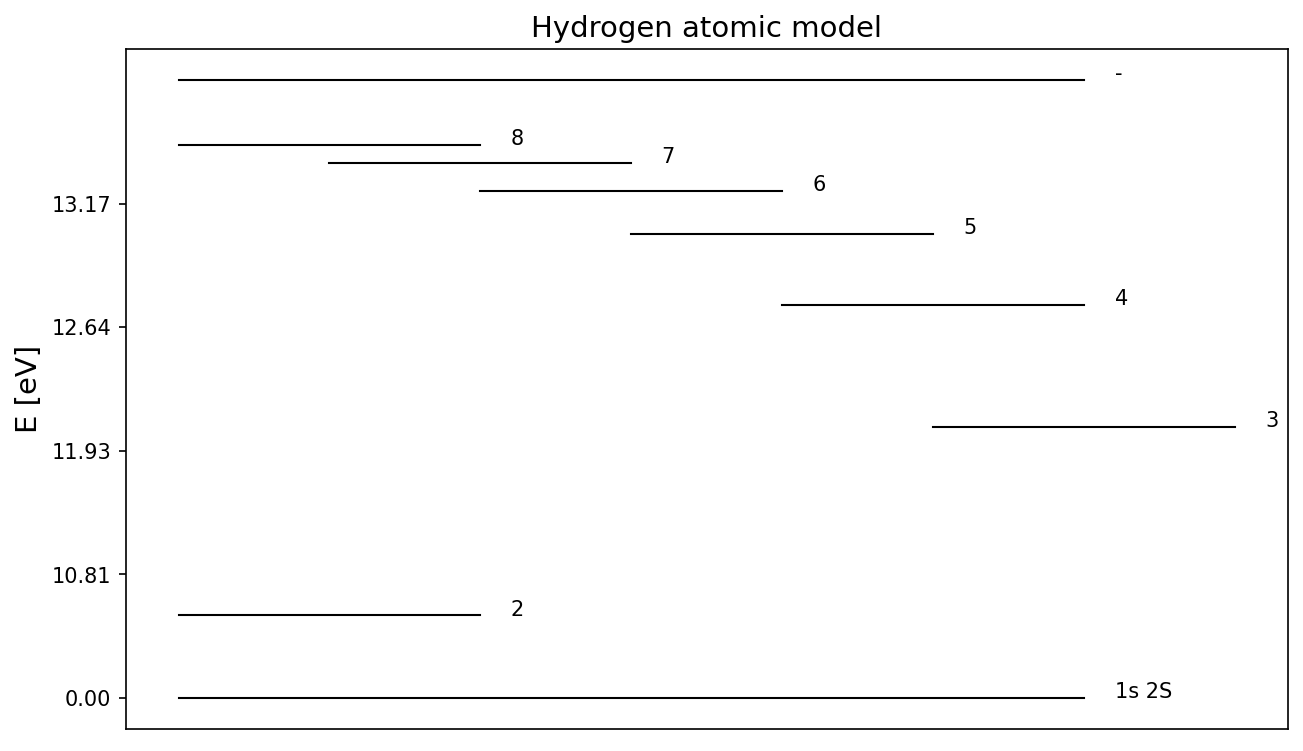

In [16]:
scaleFunc     = lambda x: x**(7)
scaleFunc_inv = lambda x : x**(1/7)

gro = Grotrian.Grotrian(_atom=atom, _path=paths["Grotrian"], 
                        _scaleFunc=scaleFunc, _scaleFunc_inv=scaleFunc_inv)
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50 )

gro.show_fig()

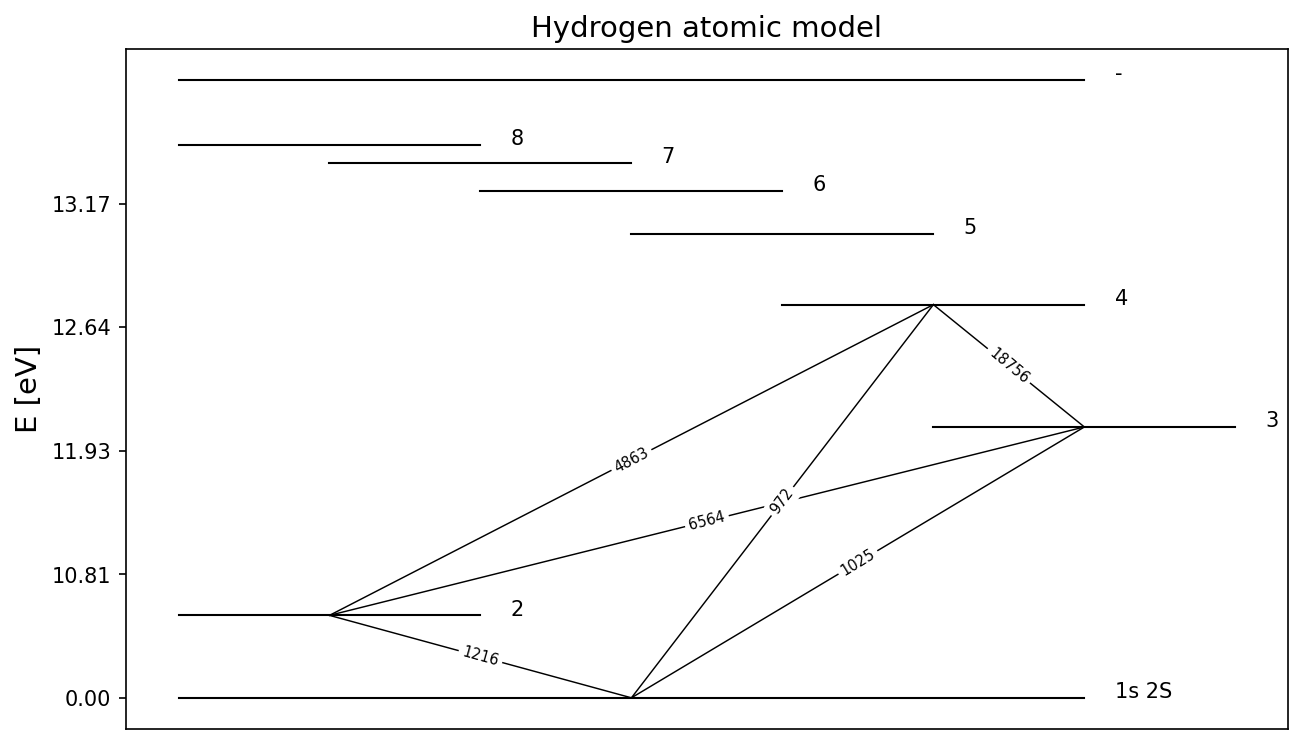

In [19]:
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50 )

gro.plot_transitions(_text_selection="wavelength")
gro.show_fig()

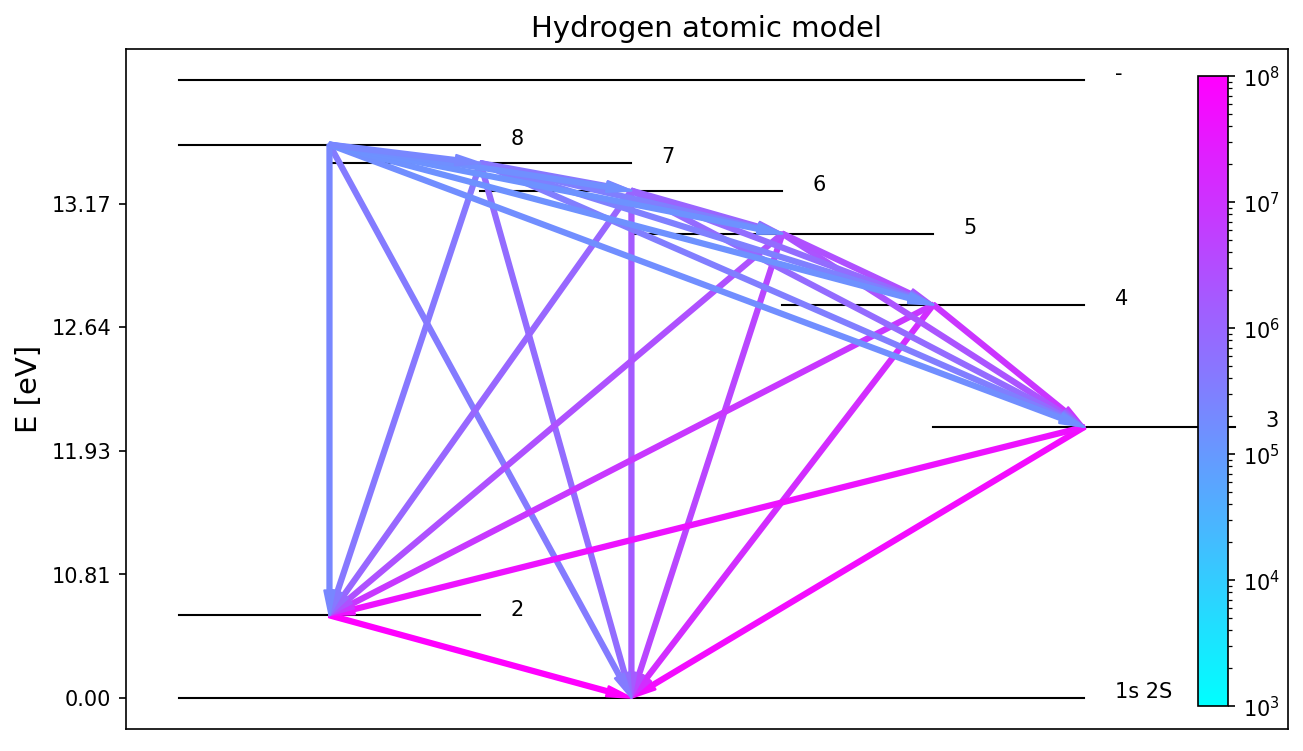

In [20]:
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)

cmap = plt.get_cmap('cool')
norm = LogNorm(1E3, 1E8, clip=True)

#--------------
idxI = np.append( atom.Line.idxI, atom.Cont.idxI )
idxJ = np.append( atom.Line.idxJ, atom.Cont.idxJ )
#--------------
rate = np.append( atom.Line.AJI[:], np.zeros(atom.nCont) )
#--------------

gro.plot_transition_rate(_idxI=idxI, 
                         _idxJ=idxJ, 
                         _rate=rate, 
                         _direction="j->i",
                         _cmap=cmap, _norm=norm, _abserr=1E-3)

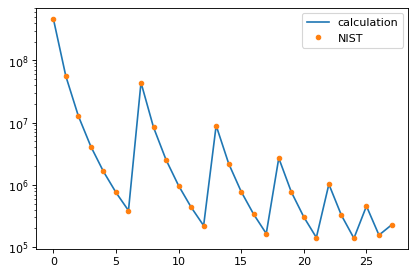

In [21]:
ni_arr = atom.Line.idxI[:] + 1
nj_arr = atom.Line.idxJ[:] + 1
Aji = Hydrogen.Einstein_A_coefficient(ni_arr, nj_arr)


fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=80)
ax.plot( Aji[:], label="calculation")
ax.plot( atom.Line.AJI[:], 'o', markersize=4, label="NIST" )

ax.legend(loc="best")
ax.set_yscale("log")
plt.show()